In [20]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import pandas as pd
import statsmodels.api as sm

# Lab08 - Bài tập

### Bài 1

Nghiên cứu mức thu nhập ($X$) và chi tiêu ($Y$) trong một tháng của một công ty. Khảo sát ngẫu nhiên 7 nhân viên, ta thu được bảng số liệu sau:

| X            | 130     | 150      | 133      | 170      | 170      | 210      | 230      |
| :----------: | :-----: | :------: | :------: | :------: | :------: | :------: | :------: |
| **Y**        | **84**  | **120**  | **108**  | **130**  | **130**  | **150**  | **160**  |


a. Dựa vào bảng dữ liệu trên cho biết có xây dựng được mô hình hồi quy hay không? Nếu có hãy xây dựng mô hình hồi quy để ước tính chi tiêu dựa theo thu nhập

In [21]:
X = np.array([130, 150, 133, 170, 170, 210, 230])
Y = np.array([84, 120, 108, 130, 130, 150, 160])

np.corrcoef(X, Y)

array([[1.        , 0.94705241],
       [0.94705241, 1.        ]])

Ta thấy hệ số tương quan là: __0.9470__ cho thấy 2 biến x, y có tương quan tuyến tính mạnh. Vì vậy, có thể xây dựng mô hình hồi quy tuyến tính cho 2 biến x, y

Mô hình hồi quy tuyến tính đơn biến có công thức như sau:
$$\hat{y} = \beta_0 + \beta_1x$$

Trong đó:
- $\hat{y}$: là giá trị dự đoán của biến $y$
- $x$: giá trị của biến tiên lượng
- $\beta_0$: là giao điểm (*intercept*) của đường thẳng hồi quy và trục tung
- $\beta_1$: là độ dốc của đường thẳng hồi quy, thể hiện mức độ thay đổi của biến $y$ khi biến $x$ thay đổi một đơn vị

Bằng phương pháp bình phương tối tiểu tổng sai số giữa giá trị thực tế và giá trị dự đoán: $\sum(y_i - \hat{y_i})^2$, ta có được công thức tính độ dốc và giao điểm của đường thẳng hồi quy như sau:

$$\beta_1 = \frac{s_{xy}}{s_{xx}} = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sum(x_i - \bar{x})^2}$$

$$\beta_0 = \bar{y} - \beta_1\bar{x}$$

*Lưu ý*: phương trình đường thẳng hồi quy  đi qua điểm $(\bar{x}, \bar{y})$

In [22]:
b1 = np.sum((X - X.mean()) * (Y - Y.mean())) / np.sum((X - X.mean()) ** 2)
b0 = Y.mean() - b1 * X.mean()

print(f"Phương trình hồi quy tuyến tính: Y = {b0:.4f} + {b1:.4f} * X")

Phương trình hồi quy tuyến tính: Y = 17.2706 + 0.6380 * X


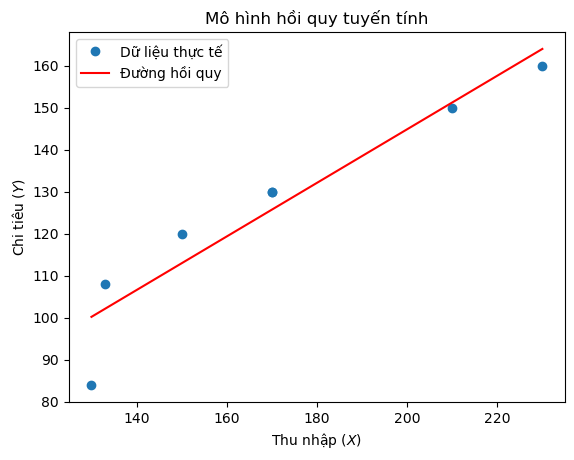

In [23]:
plt.plot(X, Y, 'o', label="Dữ liệu thực tế")

x0 = X.min()
y0 = b0 + b1 * x0
x1 = X.max()
y1 = b0 + b1 * x1
plt.plot([x0, x1], [y0, y1], color='red', label="Đường hồi quy")

plt.xlabel('Thu nhập ($X$)')
plt.ylabel('Chi tiêu ($Y$)')
plt.title('Mô hình hồi quy tuyến tính')
plt.legend()

plt.show()

b. Dự đoán mức chi tiêu của nhân viên công ty trên nếu biết thu nhập là 200$

In [24]:
income = 200
predicted_expense = b0 + b1 * income
print(f"Dự đoán chi tiêu khi thu nhập là {income}$: {predicted_expense:.4f}")

Dự đoán chi tiêu khi thu nhập là 200$: 144.8659


### Bài 2

Tiến hành nghiên cứu mối quan hệ giữa:

- X: giá bán kẻ của thịt gà (nghìn/kg) 
- Y: lượng thịt gà tiêu thụ (kg/tháng)

Dữ liệu thu được gồm 10 tháng như sau:

| X            | 35       | 40       | 45       | 40       | 38       | 40       | 45       | 30       | 42       | 38       |
| :----------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: |
| **Y**        | **2.29** | **2.04** | **0.59** | **2.06** | **2.50** | **2.32** | **1.57** | **3.96** | **1.43** | **2.34** |


a. Dựa vào bảng dữ liệu trên cho biết có xây dựng được mô hình hồi quy hay không? Nếu có hãy xây dựng mô hình hồi quy để ước tính lượng tiêu thụ thịt gà theo giá bán.

In [25]:
X = np.array([35, 40, 45, 40, 38, 40, 45, 30, 42, 38])
Y = np.array([2.29, 2.04, 0.59, 2.06, 2.50, 2.32, 1.57, 3.96, 1.43, 2.34])

np.corrcoef(X, Y)

array([[ 1.        , -0.91953287],
       [-0.91953287,  1.        ]])

Ta thấy hệ số tương quan là: __-0.9193__ cho thấy 2 biến x, y có tương quan tuyến tính ngược mạnh. Vì vậy, có thể xây dựng mô hình hồi quy tuyến tính cho 2 biến x, y

Mô hình hồi quy tuyến tính đơn biến có công thức như sau:
$$\hat{y} = \beta_0 + \beta_1x$$

Trong đó:
- $\hat{y}$: là giá trị dự đoán của biến $y$
- $x$: giá trị của biến tiên lượng
- $\beta_0$: là giao điểm (*intercept*) của đường thẳng hồi quy và trục tung
- $\beta_1$: là độ dốc của đường thẳng hồi quy, thể hiện mức độ thay đổi của biến $y$ khi biến $x$ thay đổi một đơn vị

Bằng phương pháp bình phương tối tiểu tổng sai số giữa giá trị thực tế và giá trị dự đoán: $\sum(y_i - \hat{y_i})^2$, ta có được công thức tính độ dốc và giao điểm của đường thẳng hồi quy như sau:

$$\beta_1 = \frac{s_{xy}}{s_{xx}} = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sum(x_i - \bar{x})^2}$$

$$\beta_0 = \bar{y} - \beta_1\bar{x}$$

*Lưu ý*: phương trình đường thẳng hồi quy  đi qua điểm $(\bar{x}, \bar{y})$

In [26]:
b1 = np.sum((X - X.mean()) * (Y - Y.mean())) / np.sum((X - X.mean()) ** 2)
b0 = Y.mean() - b1 * X.mean()

print(f"Phương trình hồi quy tuyến tính: Y = {b0:.4f} + {b1:.4f} * X")

Phương trình hồi quy tuyến tính: Y = 9.0808 + -0.1774 * X


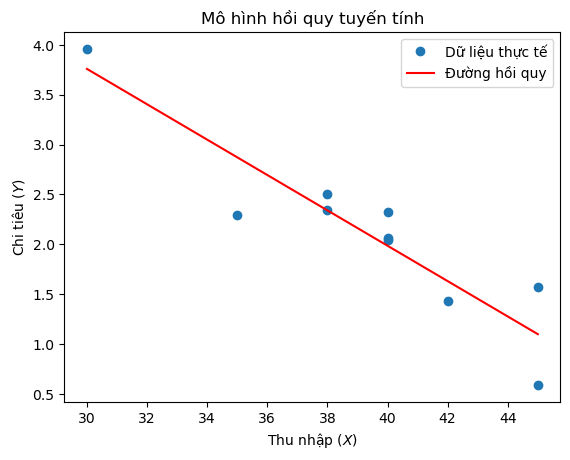

In [27]:
plt.plot(X, Y, 'o', label="Dữ liệu thực tế")

x0 = X.min()
y0 = b0 + b1 * x0
x1 = X.max()
y1 = b0 + b1 * x1
plt.plot([x0, x1], [y0, y1], color='red', label="Đường hồi quy")

plt.xlabel('Thu nhập ($X$)')
plt.ylabel('Chi tiêu ($Y$)')
plt.title('Mô hình hồi quy tuyến tính')
plt.legend()

plt.show()

b. Dự đoán lượng tiêu thụ khi giá bán lẻ là 41(nghìn/tháng)

In [28]:
predicted_expense = b0 + b1 * 41
print(f"Dự đoán lượng tiêu thủ khi giá bán lẻ là {income}$: {predicted_expense:.4f}")

Dự đoán lượng tiêu thủ khi giá bán lẻ là 200$: 1.8085


## Bài 3

Dụa trên file dữ liệu `Advertising.csv` bạn hãy dự đoán doanh số bán hàng (`sales`) dựa trên số tiền chi cho các nền tảng tiếp thị khác nhau như `TV`, `Radio` và `Newspaper`

a. Đọc file dữ liệu cho biết các thông tin cơ bản về dữ liệu: kích thước, dữ liệu có giá trị trống hay không, hiện các giá trị thống kê cơ bản của các thuộc tính.

In [29]:
df = pd.read_csv("data/Advertising.csv", index_col = 0)

df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [31]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


b. Để dự đoán doanh số bằng phương pháp hồi quy tuyến tính đơn giản (Simple Linear Regression) trước tiên cần lựa chọn một trong các thuộc tính còn lại. Theo bạn thuộc tính nào phù hợp để xây dựng mô hình hồi quy. Giải thích và minh họa bằng 2 cách

Cách 1:

In [32]:
X = df["TV"]
Y = df["radio"]
Z = df["newspaper"]
sales = df["sales"]


correlation_matrix = np.corrcoef([X, Y, Z, sales])
correlation_matrix

array([[1.        , 0.05480866, 0.05664787, 0.78222442],
       [0.05480866, 1.        , 0.35410375, 0.57622257],
       [0.05664787, 0.35410375, 1.        , 0.22829903],
       [0.78222442, 0.57622257, 0.22829903, 1.        ]])

Ta thấy hệ số tương quan là: __0.78222442__ cho thấy 2 biến TV, Sales có tương quan tuyến tính tốt. Vì vậy, có thể xây dựng mô hình hồi quy tuyến tính cho 2 biến

Cách 2

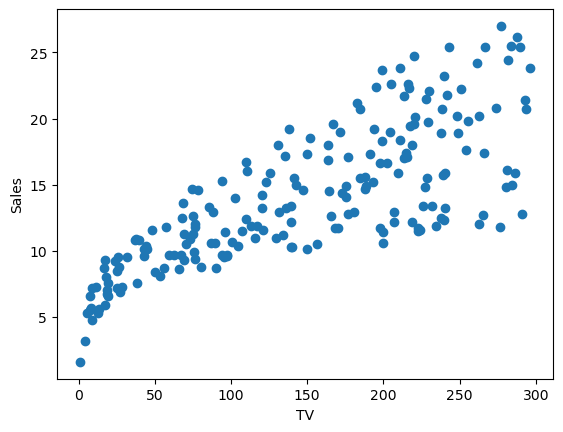

In [33]:
plt.plot(X, sales, 'o')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

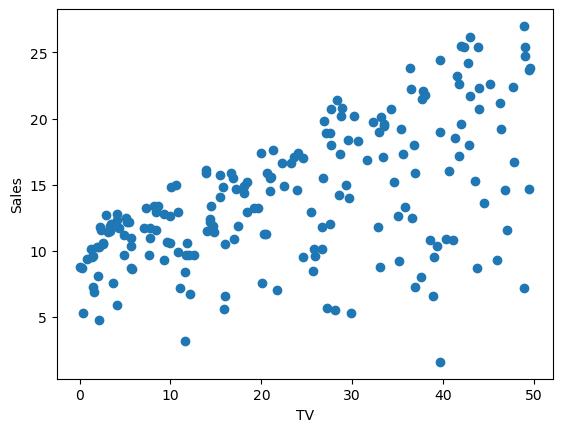

In [34]:
plt.plot(Y, sales, 'o')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

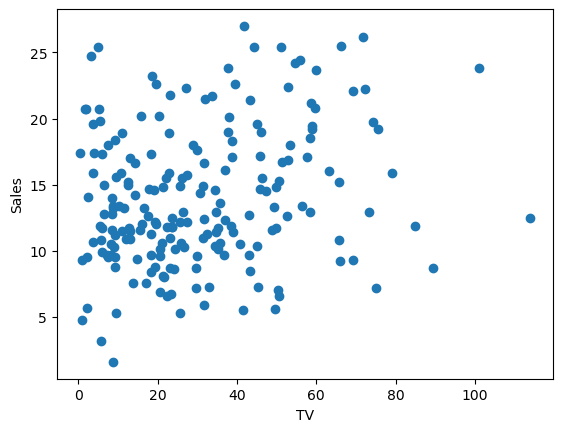

In [35]:
plt.plot(Z, sales, 'o')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

Dựa vào 3 biểu đồ trên ta thấy 2 biến TV và Sales không phân tán nhiều nhất nên ta chọn biến TV với Sales để xây dựng mô hình hồi quy tuyến tính

c. Xây dụng phương trình hồi quy, trực quan mô hình (đường thẳng) tìm được. Theo bạn để đánh giá mô hình trên cần dùng đại lượng nào?

Mô hình hồi quy tuyến tính đơn biến có công thức như sau:
$$\hat{y} = \beta_0 + \beta_1x$$

Trong đó:
- $\hat{y}$: là giá trị dự đoán của biến $y$
- $x$: giá trị của biến tiên lượng
- $\beta_0$: là giao điểm (*intercept*) của đường thẳng hồi quy và trục tung
- $\beta_1$: là độ dốc của đường thẳng hồi quy, thể hiện mức độ thay đổi của biến $y$ khi biến $x$ thay đổi một đơn vị

Bằng phương pháp bình phương tối tiểu tổng sai số giữa giá trị thực tế và giá trị dự đoán: $\sum(y_i - \hat{y_i})^2$, ta có được công thức tính độ dốc và giao điểm của đường thẳng hồi quy như sau:

$$\beta_1 = \frac{s_{xy}}{s_{xx}} = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sum(x_i - \bar{x})^2}$$

$$\beta_0 = \bar{y} - \beta_1\bar{x}$$

*Lưu ý*: phương trình đường thẳng hồi quy  đi qua điểm $(\bar{x}, \bar{y})$

In [36]:
b1 = np.sum((X - X.mean()) * (sales - sales.mean())) / np.sum((X - X.mean()) ** 2)
b0 = sales.mean() - b1 * X.mean()

print(f"Phương trình hồi quy tuyến tính: Y = {b0:.4f} + {b1:.4f} * X")

Phương trình hồi quy tuyến tính: Y = 7.0326 + 0.0475 * X


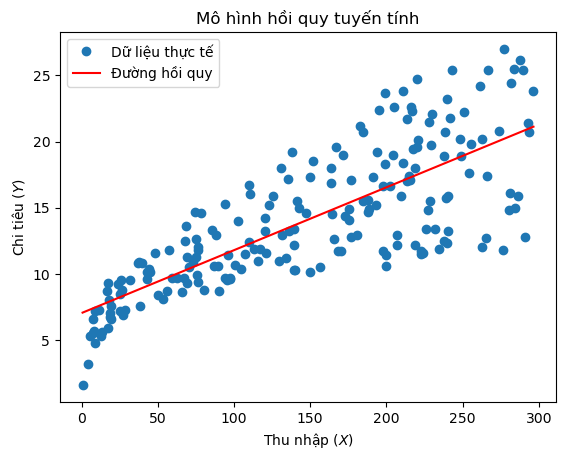

In [37]:
plt.plot(X, sales, 'o', label="Dữ liệu thực tế")

x0 = X.min()
y0 = b0 + b1 * x0
x1 = X.max()
y1 = b0 + b1 * x1
plt.plot([x0, x1], [y0, y1], color='red', label="Đường hồi quy")

plt.xlabel('Thu nhập ($X$)')
plt.ylabel('Chi tiêu ($Y$)')
plt.title('Mô hình hồi quy tuyến tính')
plt.legend()

plt.show()

In [38]:
model = sm.OLS(Y, X).fit()
print(f"R-squared: {model.rsquared:.4f}")

R-squared: 0.5532


Để đánh giá mô hình ta sử dụng hệ số xác định mô hình $R^2$ (R squared). Giá trị này thể hiện tỷ lệ phần trăm giá trị thực của biến dự đoán có thể giải thích được bằng mô hình. Giá trị của $R^2$ càng lớn thì mô hình càng tốt. 

---